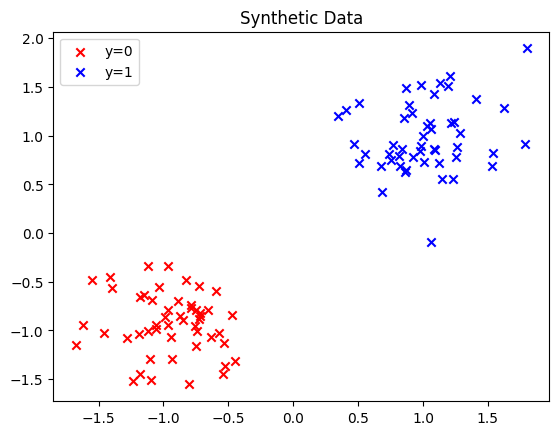

Instructions for updating:
non-resource variables are not supported in the long term


step 0, loss: 8.494293
step 1000, loss: 0.152209
step 2000, loss: 0.049939
step 3000, loss: 0.023336
step 4000, loss: 0.012477
step 5000, loss: 0.007117
step 6000, loss: 0.004200
step 7000, loss: 0.002526
step 8000, loss: 0.001534
step 9000, loss: 0.000938
step 10000, loss: 0.000574
step 11000, loss: 0.000352
step 12000, loss: 0.000216
step 13000, loss: 0.000133
step 14000, loss: 0.000081
step 15000, loss: 0.000050
step 16000, loss: 0.000031
step 17000, loss: 0.000019
step 18000, loss: 0.000011
step 19000, loss: 0.000007


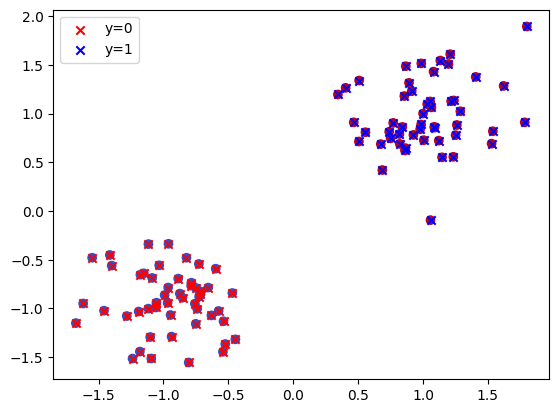

In [1]:
import numpy as np
import tensorflow as tf
# tf.compat.v1.disable_eager_execution()
import matplotlib.pyplot as plt

# Generate synthetic data
N = 100
# Zeros form a Gaussian centered at (-1, -1)
x_zeros = np.random.multivariate_normal(
    mean=np.array((-1, -1)), cov=.1*np.eye(2), size=(N//2,))
y_zeros = np.zeros((N//2,))

# Ones form a Gaussian centered at (1, 1)
x_ones = np.random.multivariate_normal(
    mean=np.array((1, 1)), cov=.1*np.eye(2), size=(N//2,))
y_ones = np.ones((N//2,))

x_np = np.vstack([x_zeros, x_ones])
y_np = np.concatenate([y_zeros, y_ones])

# Plot the data
plt.scatter(x_zeros[:,0], x_zeros[:,1], c='r', marker='x', label='y=0')
plt.scatter(x_ones[:,0], x_ones[:,1], c='b', marker='x', label='y=1')
plt.legend()
plt.title("Synthetic Data")
plt.show()

# tf.compat.v1.disable_eager_execution()
# import tensorflow.compat.v1 as tf
tf.compat.v1.disable_v2_behavior()

# Generate a TensorFlow graph
with tf.name_scope("placeholders"):
  x = tf.compat.v1.placeholder(tf.float32, (N, 2))
  y = tf.compat.v1.placeholder(tf.float32, (N,))

with tf.name_scope("weights"):
  W = tf.Variable(tf.random.normal((2, 1)))
  b = tf.Variable(tf.random.normal((1,)))

with tf.name_scope("prediction"):
  y_logit = tf.squeeze(tf.matmul(x, W) + b)
  # the sigmoid gives the class probability of 1
  y_one_prob = tf.sigmoid(y_logit)
  # Rounding P(y=1) will give the correct prediction.
  y_pred = tf.round(y_one_prob)

with tf.name_scope("loss"):
  # Compute the cross-entropy term for each datapoint
  entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y)
  # Sum all contributions
  l = tf.reduce_sum(entropy)

with tf.name_scope("optim"):
  train_op = tf.compat.v1.train.AdamOptimizer(.01).minimize(l)

with tf.name_scope("summaries"):
  tf.compat.v1.summary.scalar("loss", l)
  merged = tf.compat.v1.summary.merge_all()
  train_writer = tf.compat.v1.summary.FileWriter('logistic-train', tf.compat.v1.get_default_graph())

# Train the model, get the weights, and make predictions
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for i in range(20000):
        _, summary, loss = sess.run([train_op, merged, l], {x: x_np, y: y_np})

        if i % 1000 == 0:
            print("step %d, loss: %f" % (i, loss))

        train_writer.add_summary(summary, i)

    W_np, b_np, y_pred_np = sess.run([W, b, y_pred], {x: x_np})

#Plot the predicted outputs on top of the data:
plt.scatter(x_np[:, 0], x_np[:, 1], c=y_pred_np, cmap="coolwarm")
plt.scatter(x_zeros[:,0], x_zeros[:,1], c='r', marker='x', label='y=0')
plt.scatter(x_ones[:,0], x_ones[:,1], c='b', marker='x', label='y=1')
plt.legend()
plt.show()